In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
logs = pd.read_csv('/workspaces/secure_inference/tests/4_11_combined/full3/per_channel.csv')

In [25]:
logs['affinity_ratio'] = logs['same_label_affinity'] / logs['diff_label_affinity']
last_batch_clustering = logs.query('batch_index == 412 & (~all_zero)')

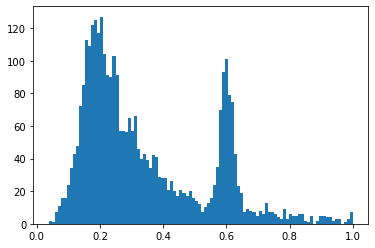

drelu channels above 0.8
False    3194
True       73
Name: drelu_mean, dtype: int64
across layers
layer4_1_2    512
layer4_0_2    512
layer4_0_1    443
layer4_1_1    402
layer3_1_2    255
layer3_0_2    248
layer3_0_1    220
layer2_1_2    128
layer2_0_1    124
layer2_0_2    106
layer2_1_1     67
layer3_1_1     65
layer1_1_2     61
layer1_0_2     53
layer1_0_1     29
layer1_1_1     23
stem           19
Name: layer_name, dtype: int64


In [ ]:
plt.hist(logs.query('batch_index == 412 & (~all_zero)')['drelu_mean'], bins=100)
plt.show()
print('drelu channels above 0.8')
print((last_batch_clustering['drelu_mean'] > 0.8).value_counts())
print('across layers')
print(last_batch_clustering['layer_name'].value_counts())

mean affinity ratio 0.5409378004860746


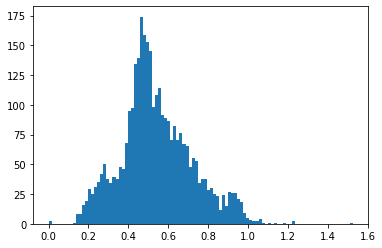

affinity ratio per layer
                 min       max      mean
layer_name                              
layer1_0_1  0.161775  0.888969  0.458601
layer1_0_2  0.123918  1.067146  0.655391
layer1_1_1  0.138589  0.904348  0.484519
layer1_1_2 -0.000000  1.526567  0.805259
layer2_0_1  0.458839  1.004720  0.774213
layer2_0_2  0.382392  0.962256  0.568170
layer2_1_1  0.242764  0.912374  0.570833
layer2_1_2  0.359067  1.225015  0.625468
layer3_0_1  0.436098  0.992208  0.739988
layer3_0_2  0.309107  0.912655  0.646550
layer3_1_1  0.268896  0.938102  0.616835
layer3_1_2  0.267478  1.013938  0.647565
layer4_0_1  0.169318  0.976468  0.577040
layer4_0_2  0.006341  0.805827  0.468302
layer4_1_1  0.138005  0.783791  0.289910
layer4_1_2  0.313984  0.645072  0.464861
stem        0.262184  0.680722  0.358846
mean across batches
batch_index
52     0.517084
92     0.518929
132    0.526110
172    0.526786
212    0.510543
252    0.525387
292    0.525402
332    0.529210
372    0.533819
412    0.537060
Name

In [36]:
print(f'mean affinity ratio {last_batch_clustering["affinity_ratio"].mean()}')
plt.hist(last_batch_clustering['affinity_ratio'], bins=100)
plt.show()
print('affinity ratio per layer')
print(last_batch_clustering.groupby('layer_name')['affinity_ratio'].agg(['min', 'max', 'mean']))
print('mean across batches')
print(logs.query('(~failed_to_converge) & (~all_zero)').groupby('batch_index')['affinity_ratio'].mean())

In [49]:
last_batch_clustering.query('layer_name == "layer1_1_2"').sort_values('affinity_ratio', ascending=False)[
    ['affinity_ratio', 'drelu_mean', 'cluster_amount']
    ]

,affinity_ratio,drelu_mean,cluster_amount
35409,1.526567,0.997661,253.0
35419,1.225059,0.183551,80.0
35452,1.190446,0.905923,148.0
35407,1.070125,0.198274,32.0
35394,1.067716,0.256160,58.0
...,...,...,...
35413,0.380952,0.849991,252.0
35404,-0.000000,0.999990,1024.0
35431,NaN,0.936755,1024.0
35437,NaN,1.000000,1024.0
